In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import DBSCAN
import pickle
import warnings
warnings.filterwarnings("ignore")

  Partitioned-based Clustering
• Hierarchical Clustering
• Density-based Clustering

##  Data importing & describing

In [27]:
#Importing the data
df = pd.read_excel(r'/Users/macpro/Downloads/Online Retail.xlsx')

In [28]:
# Display the first few rows of the DataFrame

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [31]:
df.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,NaT,NaT,9.55225,218.081158,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,541909.0,NaN,NaN,NaN,NaT,NaT,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,NaN,NaN,NaN,NaT,NaT,15287.69057,1713.600303,12346.0,13953.0,15152.0,16791.0,18287.0
Country,541909,38,United Kingdom,495478,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
#Columns with null values
null_columns = df.columns[df.isnull().any()]
print("Columns with Null Values:", null_columns)



Columns with Null Values: Index(['Description', 'CustomerID'], dtype='object')


In [33]:
# Finding all rows with NaN values and their count
nan_rows = df[df.isna().any(axis=1)]
nan_rows_count = nan_rows.shape[0]

# Displaying the rows with NaN values and their count
print("Rows with NaN Values and their Count:", nan_rows_count)
print("Rows with NaN Values:")
print(nan_rows)


Rows with NaN Values and their Count: 135080
Rows with NaN Values:
       InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID       

In [34]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(df.isnull().sum())/len(df), 2)
print(df_null)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


## Step 2 : Data Cleansing

In [35]:
# Droping rows with missing values

df = df.dropna()
df.shape

(406829, 8)

In [36]:
# Changing the datatype of Customer Id as per the business data description 

df['CustomerID'] = df['CustomerID'].astype(str)

## Data Preparation

We are going to analyze the customers based on RFM factors:
R (Recency): Number of days since the last purchase.
F (Frequency): Number of transactions.
M (Monetary): Total amount of transactions (revenue contributed)

In [37]:
#  Monetary calculation

df['Amount'] = df['Quantity']*df['UnitPrice']
RFM_M = df.groupby('CustomerID')['Amount'].sum()
RFM_M =RFM_M.reset_index()
RFM_M.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [38]:
#  Frequency  Calculation

RFM_F = df.groupby('CustomerID')['InvoiceNo'].count()
RFM_F = RFM_F.reset_index()
RFM_F.columns = ['CustomerID', 'Frequency']
RFM_F.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [39]:
#  Recency  Calculation

# Convert the date column to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

# Calculate the latest date in the dataset
latest_date = df['InvoiceDate'].max()

# Compute the difference between the latest date and transaction date
df['Diff'] = (latest_date - df['InvoiceDate']).dt.days

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [40]:
# Compute last transaction date to get the recency of customers

RFM_R = df.groupby('CustomerID')['Diff'].min()
RFM_R = RFM_R .reset_index()
RFM_R .head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [41]:
# Merge the dataframes to get the final RFM dataframe
# Merging the two dfs

RFM = pd.merge(RFM_M, RFM_F, on='CustomerID', how='inner')
RFM.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [44]:
RFM= pd.merge(RFM, RFM_R, on='CustomerID', how='inner')
RFM.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


### Outlier Analysis of Amount Frequency and Recency using box plot

Text(0.5, 0, 'Attributes')

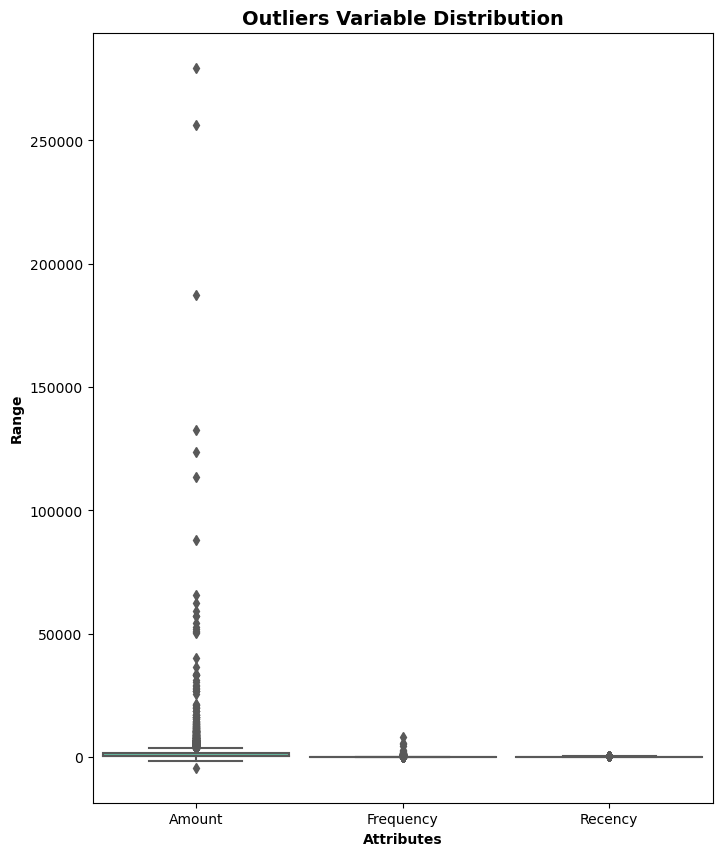

In [58]:
# Outlier Analysis of Amount Frequency and Recency  using box plot

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [8,10]
sns.boxplot(data = RFM[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.9)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')


In [59]:
# Removing  outliers for Amount
Q1 = RFM.Amount.quantile(0.05)
Q3 = RFM.Amount.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]


In [60]:
# Removing outliers for Recency
Q1 = RFM.Recency.quantile(0.05)
Q3 = RFM.Recency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

In [61]:
# Removing outliers for Frequency
Q1 = RFM.Frequency.quantile(0.05)
Q3 = RFM.Frequency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

#### Rescaling the Attributes

###### Most popular scaling techniques are : Min-Max Scaler, Standard Scaler, Robust Scaler
##### In this project we will use Standard Scaler

In [65]:
# Rescaling the attributes

rfm_df = RFM[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [66]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


##  Building the Model

###  K-means

In [68]:
# Define the number of clusters
n_clusters = 3

# Instantiate the KMeans model
kmeans = KMeans(n_clusters, random_state=0) 
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=3, random_state=0)

In [69]:
kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

##### Finding the Optimal Number of Clusters


In [79]:
 #Elbow-curve

l = []

for num_clusters in range(1,11):
    kmeans = KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    l.append(kmeans.inertia_)

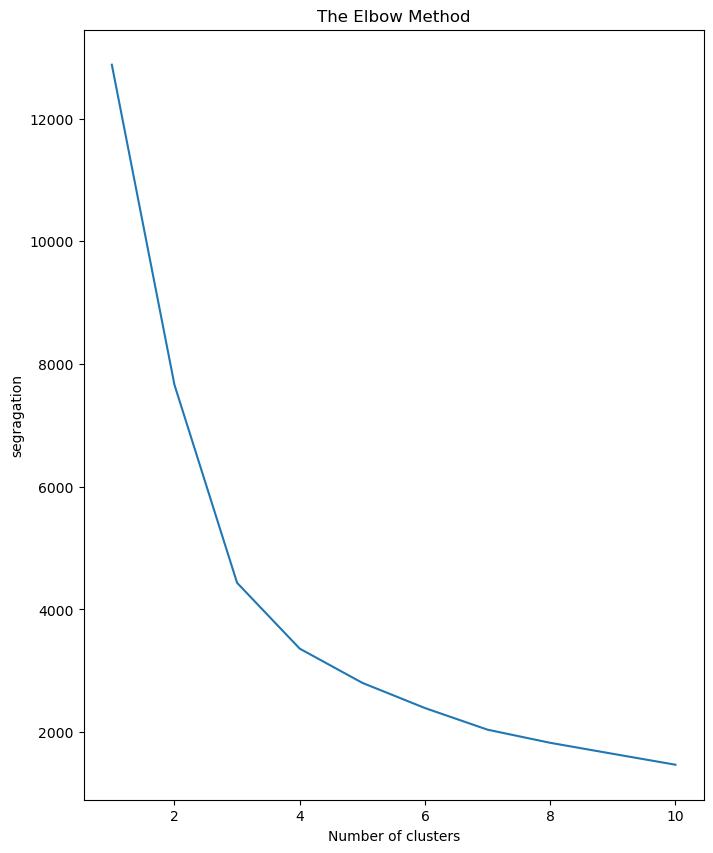

In [80]:
plt.plot(range(1,11), l)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('segragation')
plt.show()

#### Silhouette Analysis

In [84]:
# Silhouette analysis

for num_clusters in range(2,12):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4777820100216849
For n_clusters=5, the silhouette score is 0.46481058150500315
For n_clusters=6, the silhouette score is 0.41758431193450735
For n_clusters=7, the silhouette score is 0.4165309482525531
For n_clusters=8, the silhouette score is 0.40192885592712724
For n_clusters=9, the silhouette score is 0.41267790931495185
For n_clusters=10, the silhouette score is 0.37979553995257537
For n_clusters=11, the silhouette score is 0.34502271217591546


In [85]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [86]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

In [87]:
# assign the label
RFM['Cluster_Id'] = kmeans.labels_
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


In [97]:
clusters=set(RFM['Cluster_Id'])

In [98]:
clusters

{0, 1, 2}

In [94]:
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


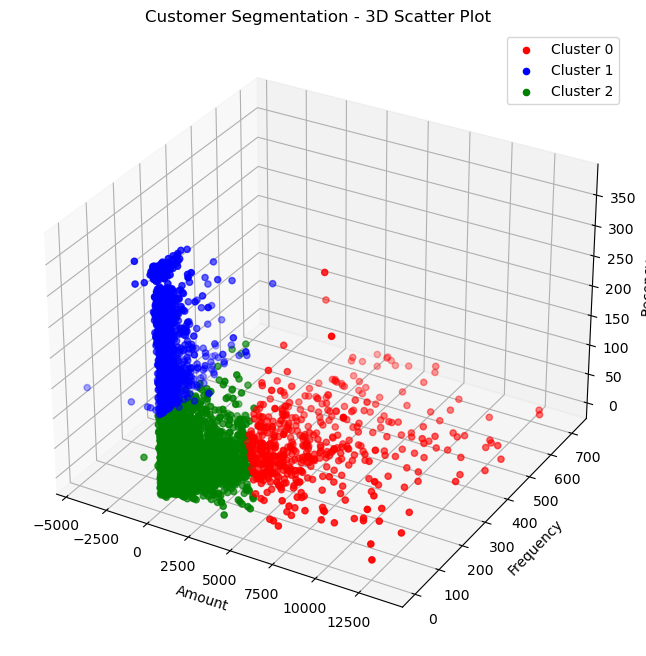

In [96]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract features and cluster IDs
x = RFM['Amount']
y = RFM['Frequency']
z = RFM['Recency']
cluster_ids = RFM['Cluster_Id']

# Scatter plot for the clusters
ax.scatter(x[cluster_ids == 0], y[cluster_ids == 0], z[cluster_ids == 0], c='red', label='Cluster 0')
ax.scatter(x[cluster_ids == 1], y[cluster_ids == 1], z[cluster_ids == 1], c='blue', label='Cluster 1')
ax.scatter(x[cluster_ids == 2], y[cluster_ids == 2], z[cluster_ids == 2], c='green', label='Cluster 2')

# Set plot labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('Customer Segmentation - 3D Scatter Plot')

# Show legend and plot
plt.legend()
plt.show()

<Axes: xlabel='Cluster_Id', ylabel='Amount'>

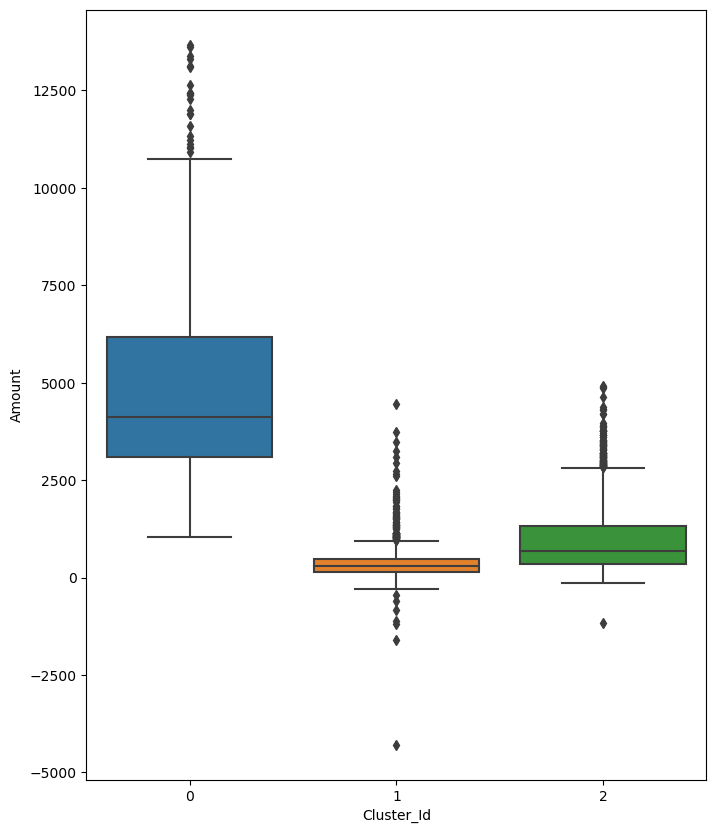

In [99]:
     #Box plot to visualize Cluster Id vs Amount

sns.boxplot(x='Cluster_Id', y='Amount', data=RFM)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

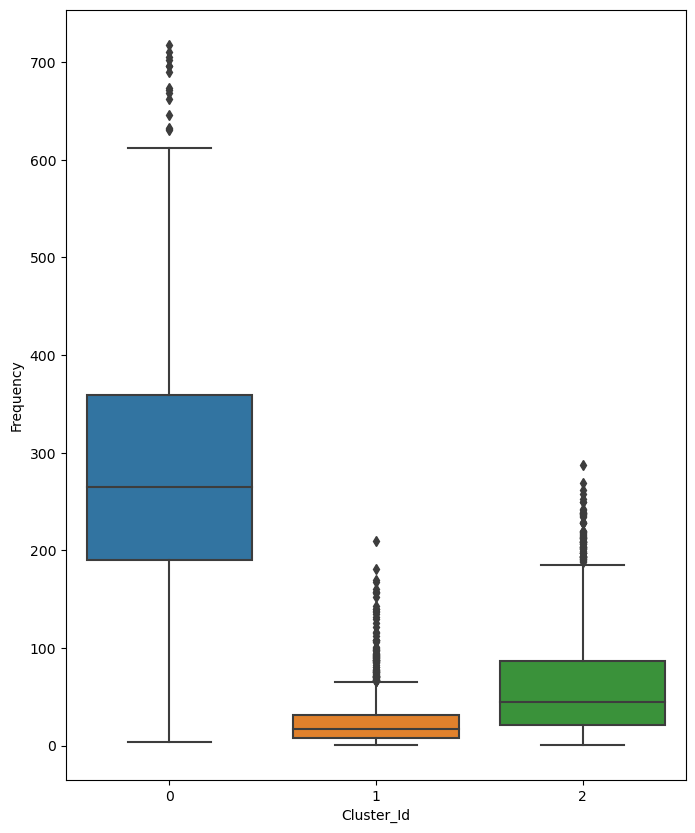

In [100]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)

<Axes: xlabel='Cluster_Id', ylabel='Recency'>

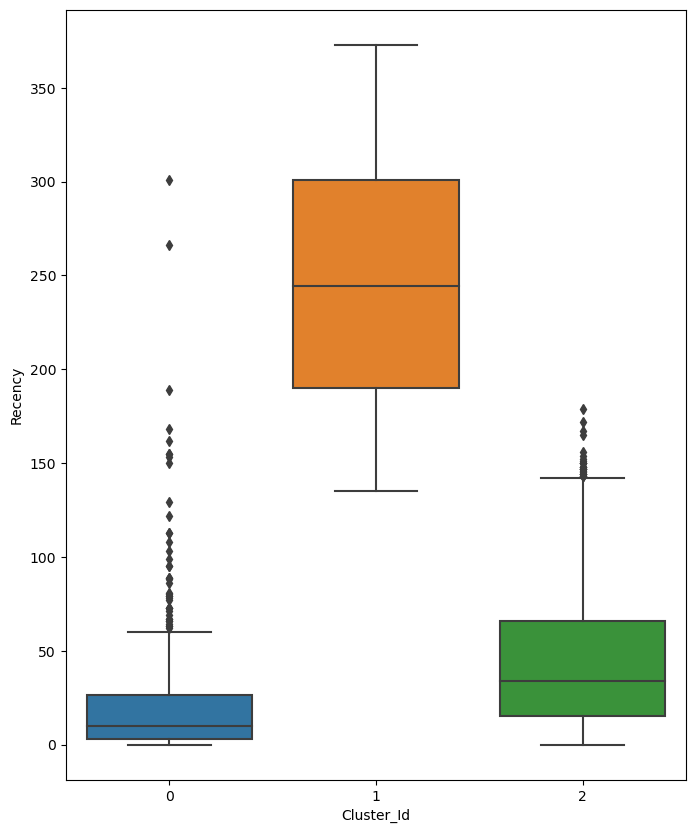

In [101]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)

After Visualizing the clusters with the 3D figure and boxplot we see that outliers persist within clusters, 

the data points within those clusters have significant variations or are more spread out, resulting in a wider range of values. This phenomenon can occur due to various reasons:

Inherent Data Characteristics: Some clusters might inherently have data points with varying characteristics or behaviors, leading to outliers within those clusters.
Insufficient Feature Representation: The features we  are using for clustering may not fully capture the complexity of the underlying patterns, leading to the inclusion of outliers within the clusters.
Inadequate Preprocessing: Ineffective data preprocessing, such as improper scaling or handling of missing values, can result in outliers not being properly addressed before clustering.

To address this issue, we will use  :

Clustering algorithms that are more robust to outliers, such as DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and  hierarchical clustering, which can handle noise and outliers more effectively.

### Hierarchical clustering

##### Linkage Criteria Selection

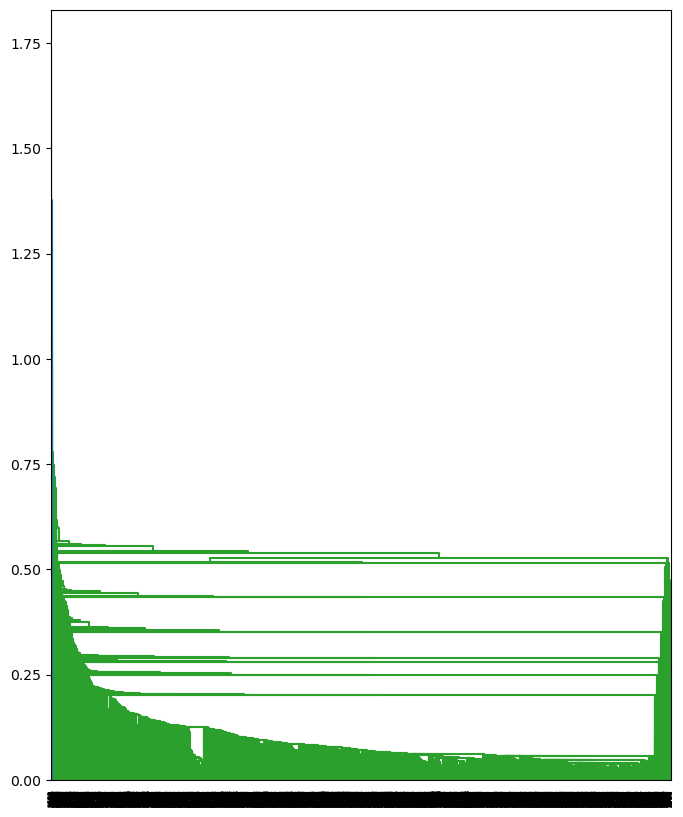

In [108]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()


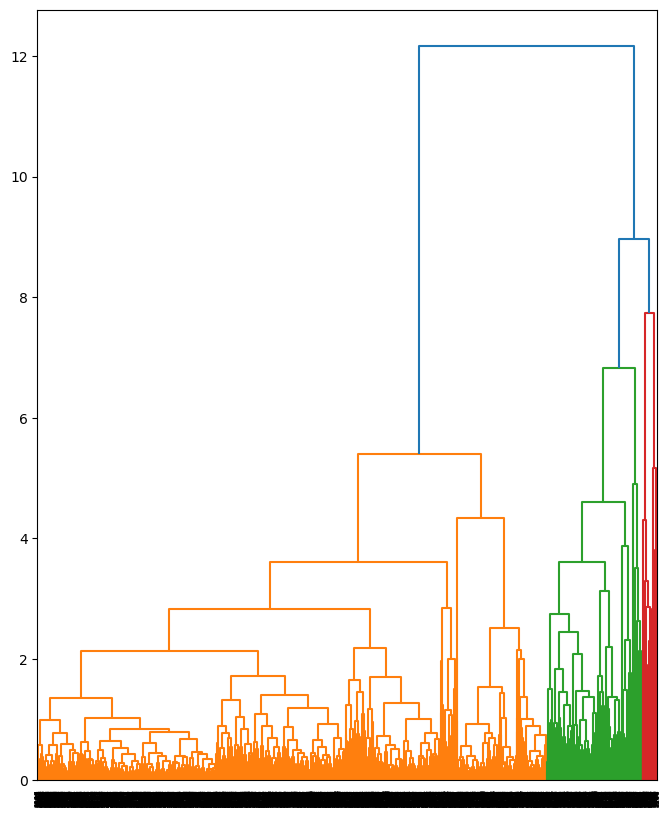

In [109]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

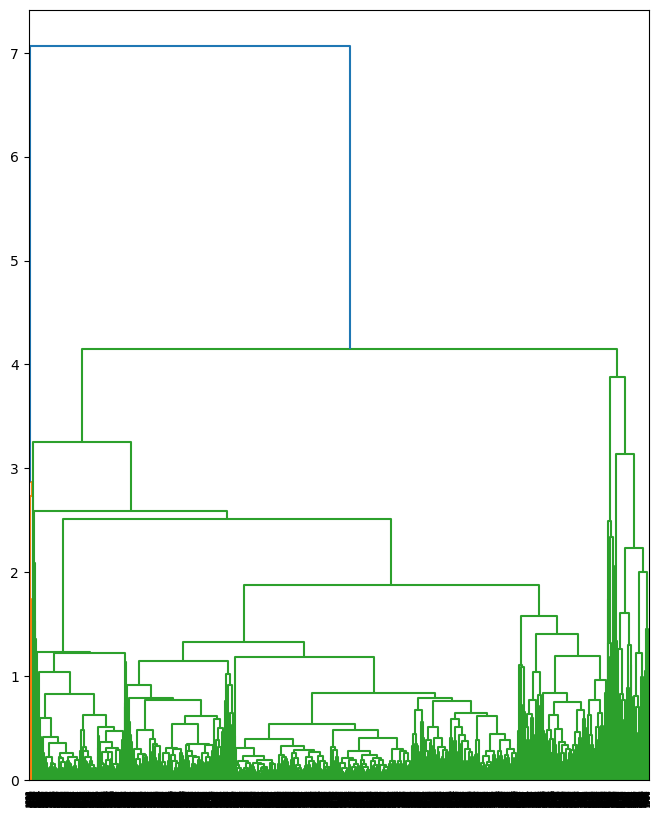

In [110]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

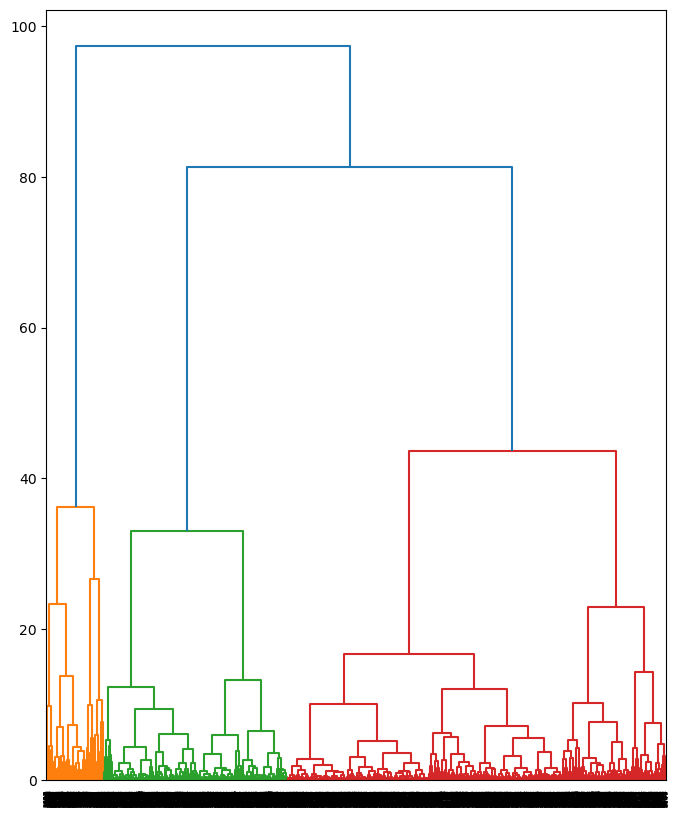

In [111]:
#Ward Linkage
mergings = linkage(rfm_df_scaled, method="ward", metric='euclidean')
dendrogram(mergings)
plt.show()

Ward Linkage (ward): Ward's method tends to be robust to outliers as it minimizes the variance within clusters. It tries to minimize the total within-cluster variance, which can make it more robust to outliers compared to other methods.

By analyzing the ward linkage we can use " clusters in our model

In [127]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 2, ..., 0, 2, 2])

In [128]:
# Assign cluster labels

RFM['Cluster_Labels'] = cluster_labels
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,2,2
3,12349.0,1757.55,73,18,2,2
4,12350.0,334.40,17,309,1,0


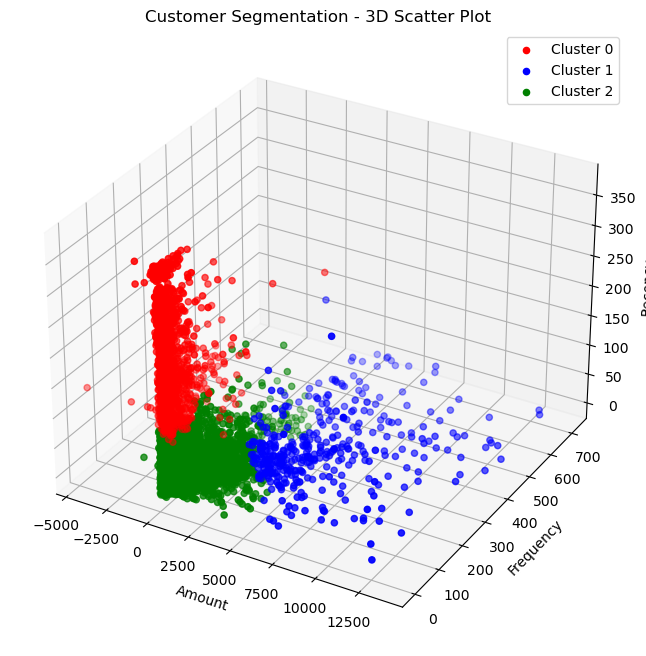

In [129]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract features and cluster IDs
x = RFM['Amount']
y = RFM['Frequency']
z = RFM['Recency']
cluster_ids = RFM['Cluster_Labels']

# Scatter plot for the clusters
ax.scatter(x[cluster_ids == 0], y[cluster_ids == 0], z[cluster_ids == 0], c='red', label='Cluster 0')
ax.scatter(x[cluster_ids == 1], y[cluster_ids == 1], z[cluster_ids == 1], c='blue', label='Cluster 1')
ax.scatter(x[cluster_ids == 2], y[cluster_ids == 2], z[cluster_ids == 2], c='green', label='Cluster 2')


# Set plot labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('Customer Segmentation - 3D Scatter Plot')

# Show legend and plot
plt.legend()
plt.show()

<Axes: xlabel='Cluster_Labels', ylabel='Amount'>

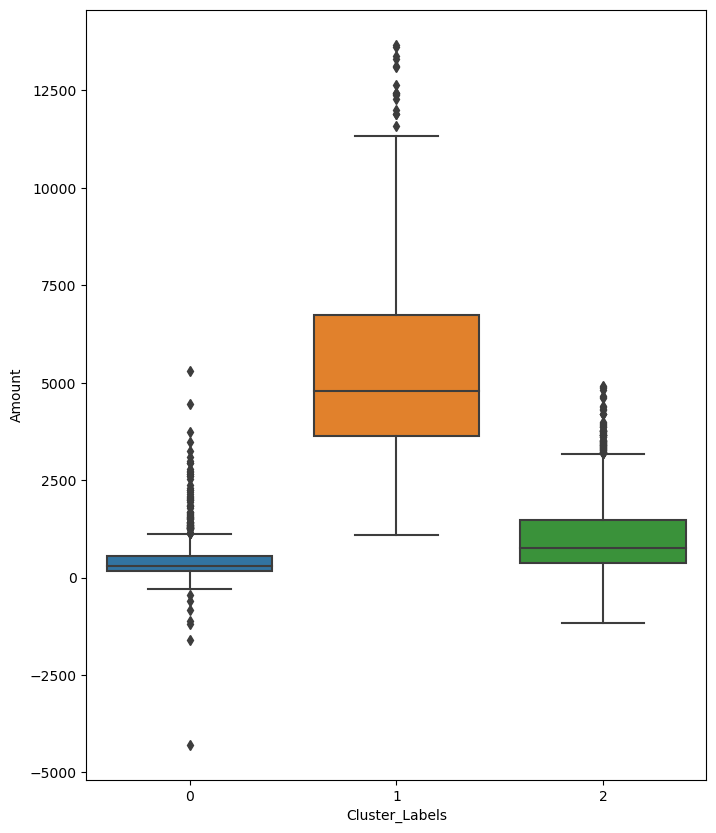

In [130]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=RFM)

<Axes: xlabel='Cluster_Labels', ylabel='Frequency'>

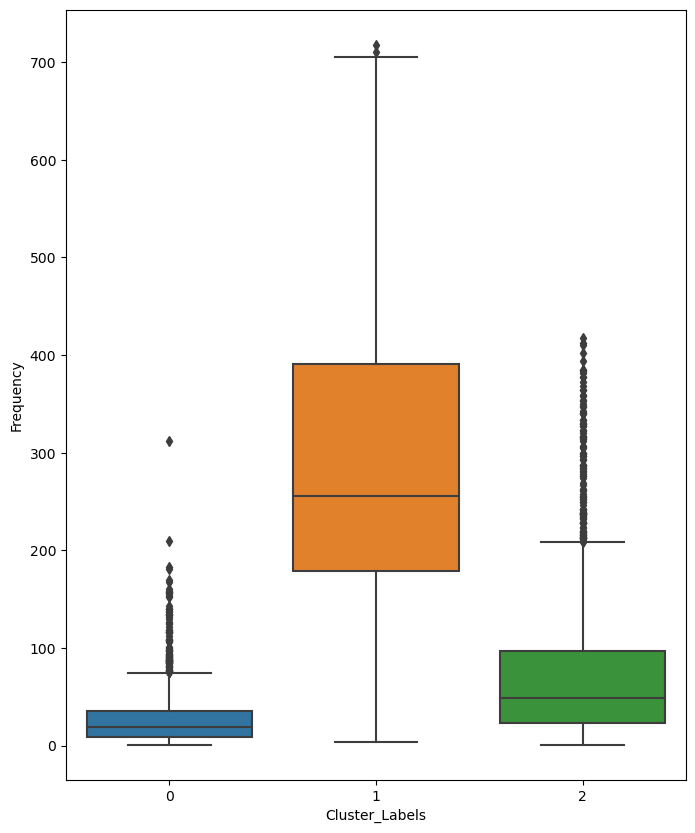

In [131]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=RFM)

<Axes: xlabel='Cluster_Labels', ylabel='Recency'>

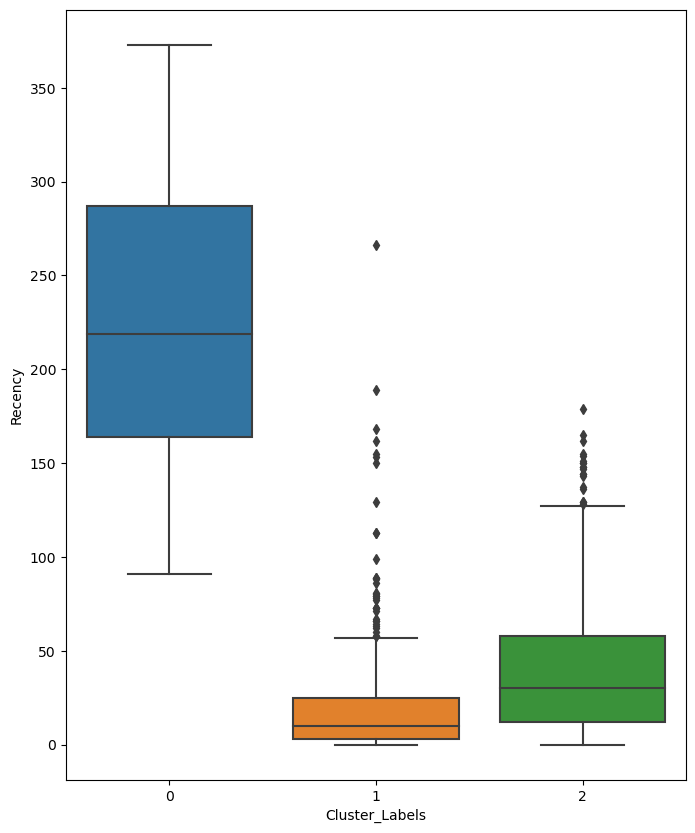

In [132]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=RFM)

The hierarchical clustering method also indicated a similar outcome to the K-means algorithm, suggesting the presence of three clusters. However, despite the consistency in the number of clusters, outliers are still evident within the data

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [282]:
dbscan = DBSCAN(eps=0.2, min_samples=15, metric='euclidean')
dbscan.fit(rfm_df_scaled)

# The labels_ attribute will contain the cluster labels
cluster_db = dbscan.labels_

In [283]:
cluster_db

array([ 0, -1,  0, ...,  0,  0,  0])

In [278]:
# Assign cluster labels

RFM['cluster_db'] = cluster_db
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels,cluster_db
0,12346.0,0.00,2,325,1,0,0
1,12347.0,4310.00,182,1,0,1,-1
2,12348.0,1797.24,31,74,2,2,0
3,12349.0,1757.55,73,18,2,2,0
4,12350.0,334.40,17,309,1,0,0


In [279]:
set(RFM['cluster_db'])

{-1, 0}

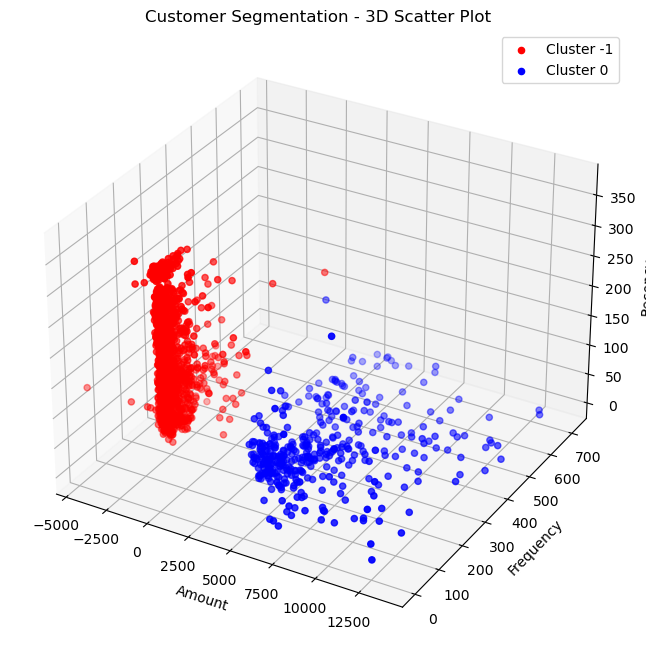

In [252]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract features and cluster IDs
x = RFM['Amount']
y = RFM['Frequency']
z = RFM['Recency']
cluster_ids = RFM['Cluster_Labels']

# Scatter plot for the clusters
ax.scatter(x[cluster_ids == 0], y[cluster_ids == 0], z[cluster_ids == 0], c='red', label='Cluster -1')
ax.scatter(x[cluster_ids == 1], y[cluster_ids == 1], z[cluster_ids == 1], c='blue', label='Cluster 0')

# Set plot labels and title
ax.set_xlabel('Amount')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('Customer Segmentation - 3D Scatter Plot')

# Show legend and plot
plt.legend()
plt.show()

<Axes: xlabel='cluster_db', ylabel='Amount'>

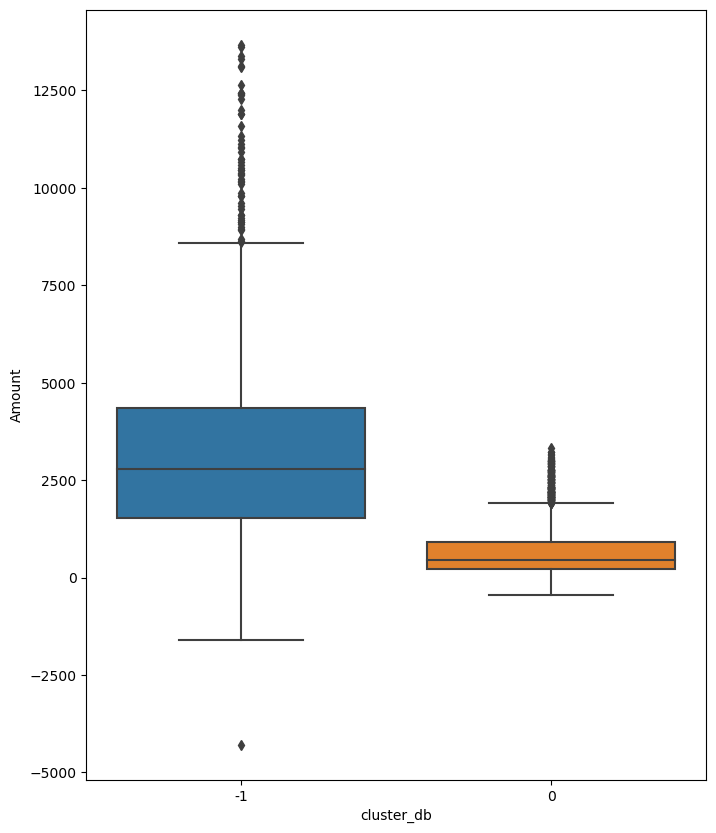

In [253]:
# Plot Cluster Id vs Amount

sns.boxplot(x='cluster_db', y='Amount', data=RFM)

<Axes: xlabel='cluster_db', ylabel='Frequency'>

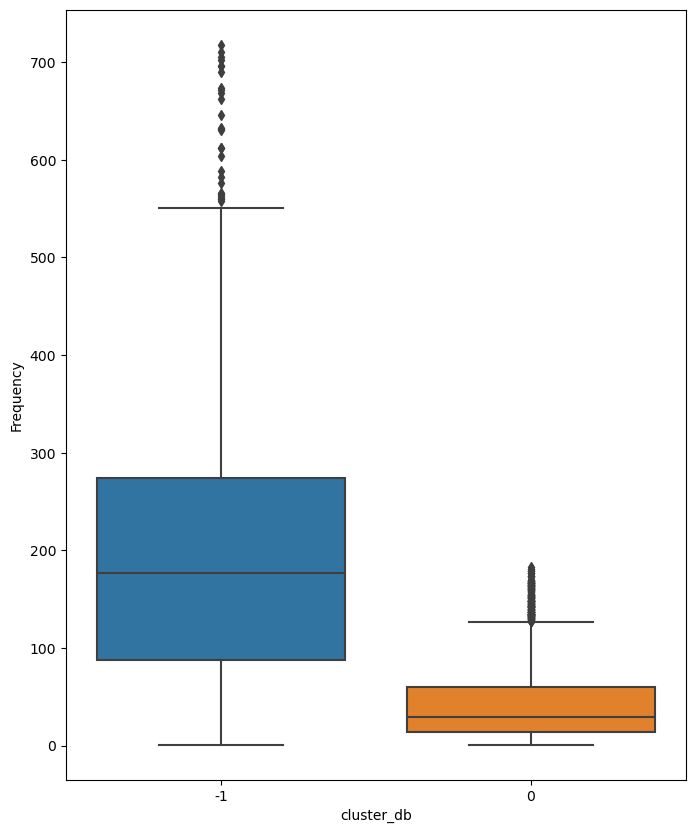

In [254]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='cluster_db', y='Frequency', data=RFM)

<Axes: xlabel='cluster_db', ylabel='Recency'>

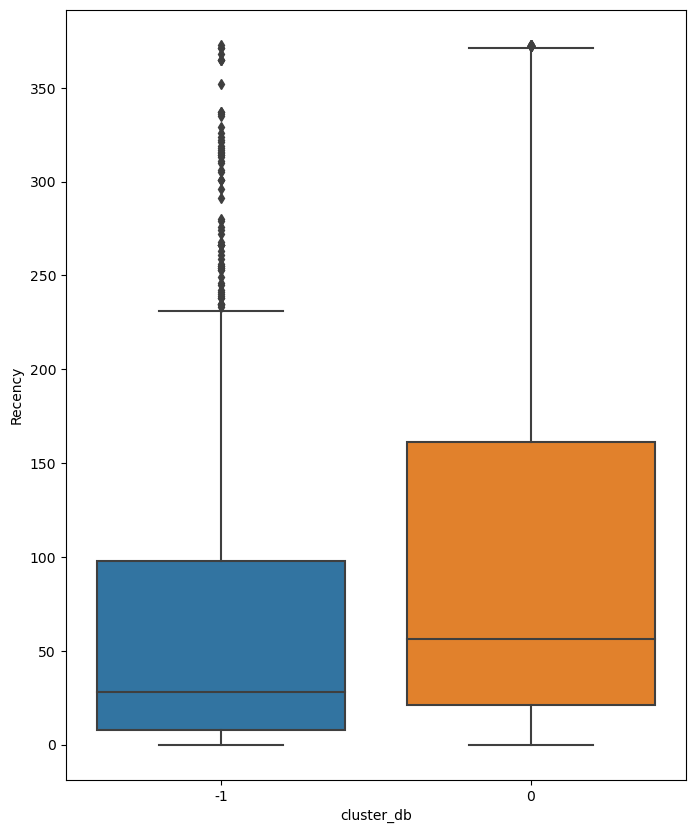

In [255]:
# Plot Cluster Id vs Recency

sns.boxplot(x='cluster_db', y='Recency', data=RFM)

### Parameter Sensitivity Analysis:

The silhouette score and Davies-Bouldin index are both metrics commonly used for evaluating the quality of clusters in unsupervised learning, particularly in the context of clustering algorithms such as DBSCAN. Here's a brief explanation of each:

Silhouette Score:
The silhouette score measures how similar an object is to its own cluster compared to other clusters.
The score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
A score near 0 indicates overlapping clusters.
Davies-Bouldin Index:
The Davies-Bouldin index evaluates the separation between clusters.
It is defined as the average similarity measure between each cluster and its most similar cluster, where similarity is based on both the distance between clusters and the size of the clusters.
The index ranges from 0 to ∞, where a lower value indicates better separation.

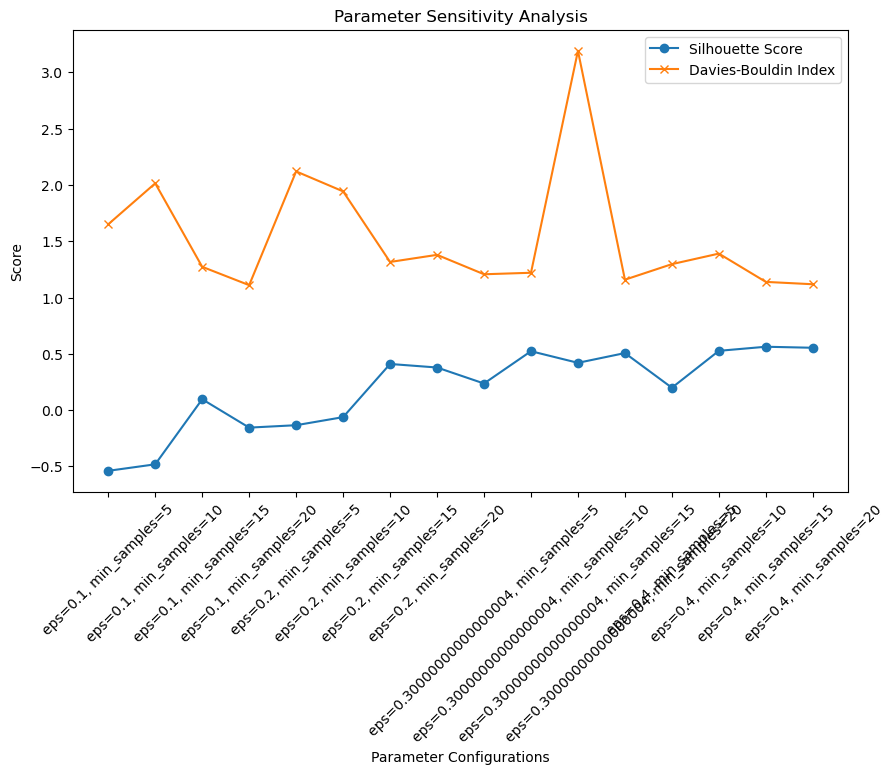

In [267]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Store silhouette scores and Davies-Bouldin indices
silhouette_scores = []
db_indices = []
# Vary eps and min_samples values
eps_values = np.arange(0.1,0.5, 0.1)
min_samples_values =np.arange(5, 25,5)

# Apply DBSCAN for different parameter configurations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(rfm_df_scaled)  # Assuming rfm_df_scaled is your scaled dataset

        # Calculate silhouette score and Davies-Bouldin index
        silhouette_avg = silhouette_score(rfm_df_scaled, dbscan.labels_)
        db_index = davies_bouldin_score(rfm_df_scaled, dbscan.labels_)

        silhouette_scores.append(silhouette_avg)
        db_indices.append(db_index)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o', label='Silhouette Score')
plt.plot(range(len(db_indices)), db_indices, marker='x', label='Davies-Bouldin Index')
plt.xticks(range(len(silhouette_scores)), [f"eps={eps}, min_samples={min_samples}" for eps in eps_values for min_samples in min_samples_values], rotation=45)
plt.xlabel('Parameter Configurations')
plt.ylabel('Score')
plt.title('Parameter Sensitivity Analysis')
plt.legend()
plt.show()

#### Graph Interpretation :

A higher silhouette score indicates better-defined clusters.

For the Davies-Bouldin index, a lower score indicates better separation.

Based on the paragraph above, the model we chose initially proves to be effective, with a high silhouette score and a low Davies-Bouldin index. This combination of scores suggests that the clusters identified by the model are well-defined and sufficiently separated.

Model chosed : eps=0.2, min_samples=15

# Conclusion 

After using  the 3 algorithms K-Means Clustering,Hierarchical Clustering and  DBSCA to find segmentation for the online retail customers we end up with the fllowing results :

#### K-Means Clustering  gave us the folowing clusters :

Customers in Cluster 0 exhibited a significant volume of transactions in comparison to other customer groups, making them the most valuable segment for the business.

Customers in Cluster 1 did not make recent purchases and are considered less crucial from a business perspective.

Customers in Cluster 2 are frequent buyers, contributing to revenue generation, albeit to a lesser extent than those in Cluster 0.

#### Hierarchical Clustering generated the subsequent clusters:

Customers in Cluster 0 did not make recent purchases and are considered less crucial from a business perspective.

Customers in Cluster 1 exhibited a significant volume of transactions in comparison to other customer groups, making them the most valuable segment for the business.

Customers in Cluster 2 are frequent buyers, contributing to revenue generation, albeit to a lesser extent than those in Cluster 0.

#### DBSCA Clustering provided us with the folowwing clusters:

Customers in Cluster 0 are frequent buyers, contributing to revenue generation.


Customers in Cluster -1 did not make recent purchases and are considered less crucial from a business perspective.



##### From a business standpoint, the K-means classification and hierarchical clusters are more insightful. 

#####  As results we will do the deployment with the K-means model.

### Saving the model

In [288]:
with open('kmeans_model7.pkl', 'wb') as file:
    pickle.dump(kmeans, file)